In [9]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import tensorflow
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/content/DATASET'):
        print(dirname)

/content/DATASET
/content/DATASET/TEST
/content/DATASET/TEST/R
/content/DATASET/TEST/O
/content/DATASET/TRAIN
/content/DATASET/TRAIN/R
/content/DATASET/TRAIN/O


In [7]:
train_path = "/content/DATASET/TRAIN/"
test_path = "/content/DATASET/TEST/"

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from glob import glob

In [9]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:15<00:00, 816.38it/s] 


In [10]:
data.shape

(22564, 2)

In [11]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

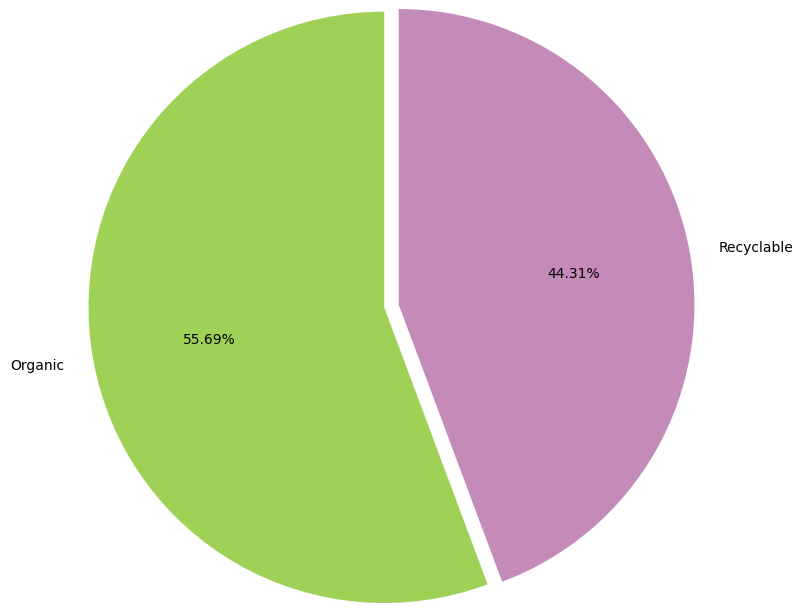

In [12]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

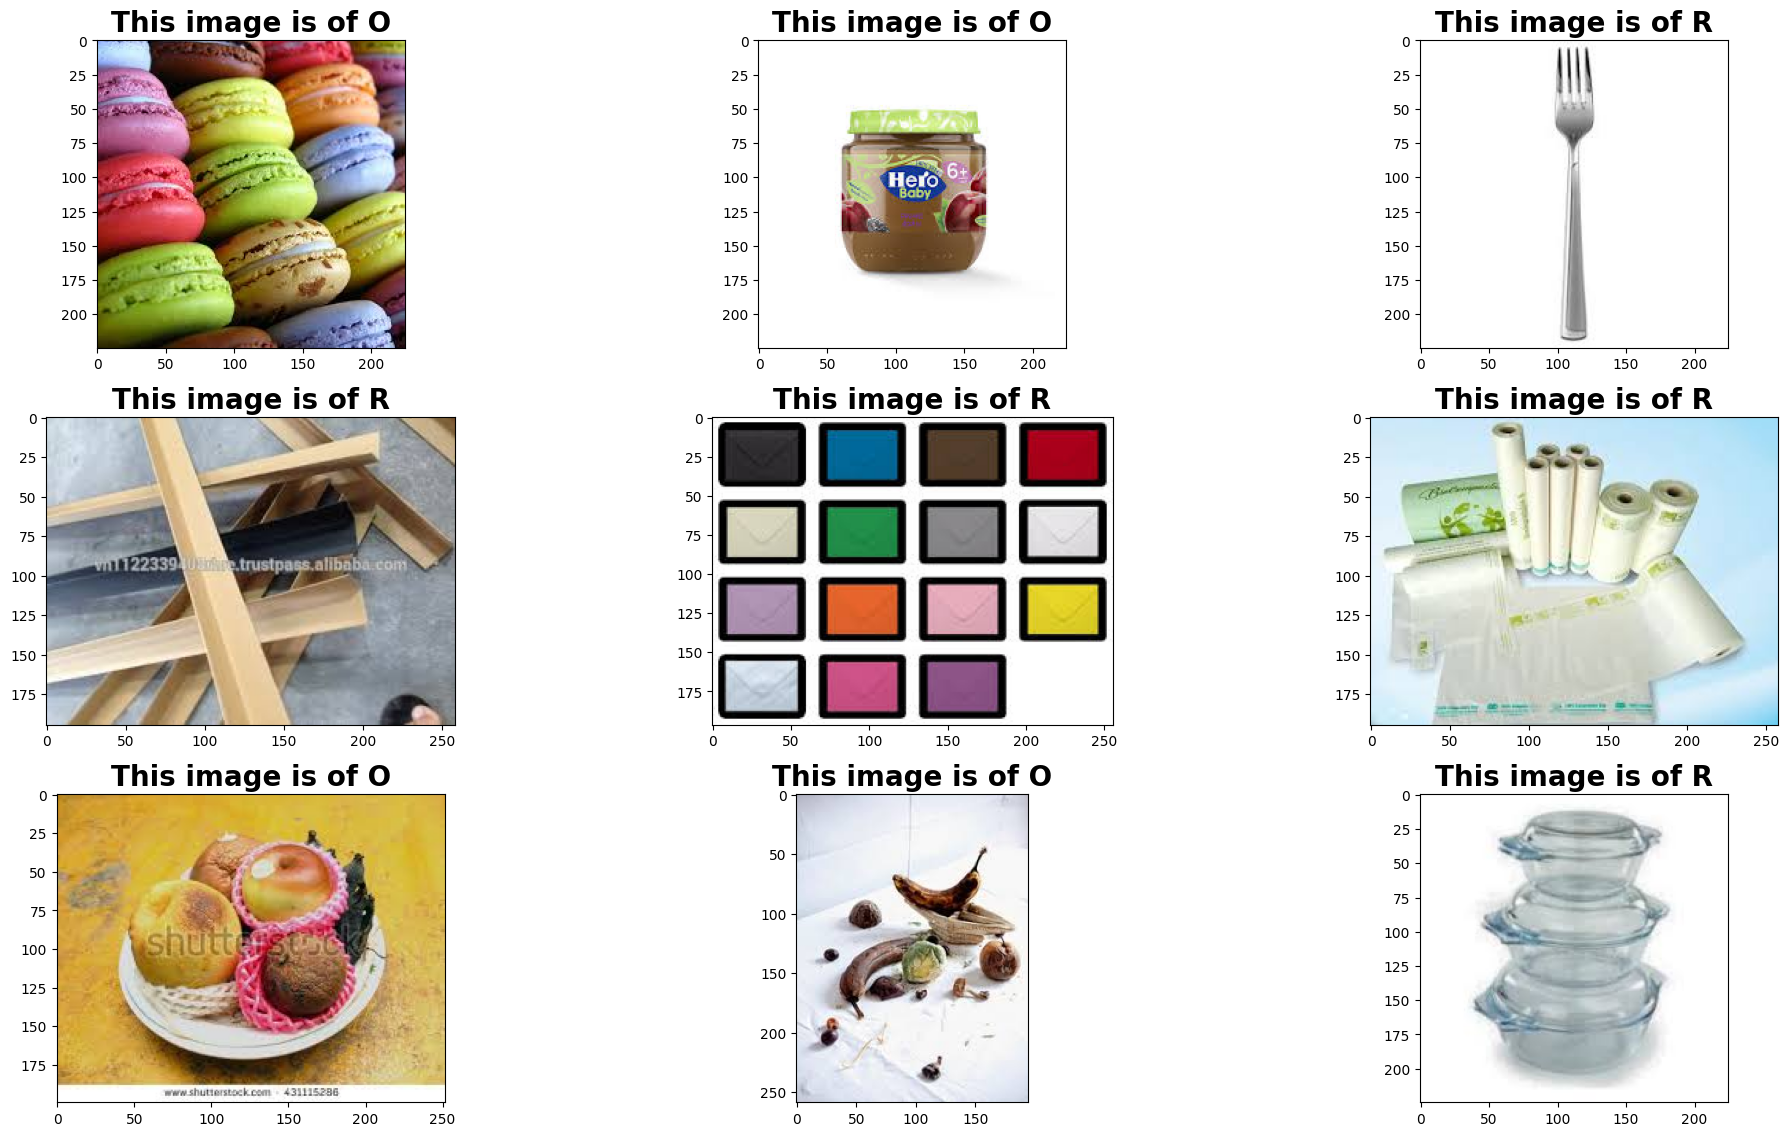

In [13]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [14]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


**CNN**

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

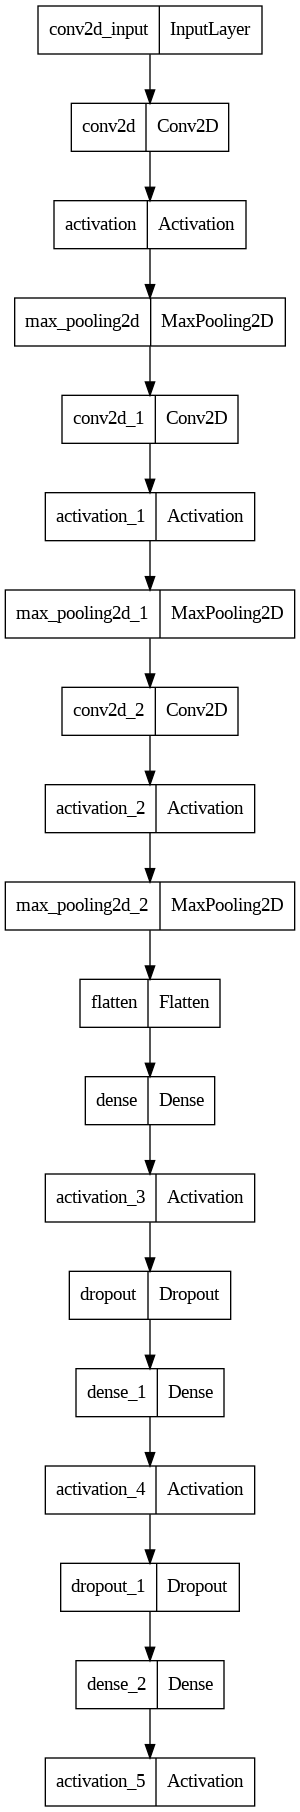

In [16]:
plot_model(model)

In [17]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
89/89 [==============================] - 1606s 18s/step - loss: 0.5569 - accuracy: 0.7669 - val_loss: 0.3863 - val_accuracy: 0.8448
Epoch 2/10
89/89 [==============================] - 1653s 19s/step - loss: 0.4259 - accuracy: 0.8205 - val_loss: 0.3232 - val_accuracy: 0.8766
Epoch 3/10
89/89 [==============================] - 1631s 18s/step - loss: 0.3936 - accuracy: 0.8381 - val_loss: 0.3103 - val_accuracy: 0.8918
Epoch 4/10
89/89 [==============================] - 1628s 18s/step - loss: 0.3583 - accuracy: 0.8564 - val_loss: 0.3040 - val_accuracy: 0.8802
Epoch 5/10
89/89 [==============================] - 1592s 18s/step - loss: 0.3276 - accuracy: 0.8717 - val_loss: 0.3136 - val_accuracy: 0.8778
Epoch 6/10
89/89 [==============================] - 1593s 18s/step - loss: 0.3090 - accuracy: 0.8775 - val_loss: 0.2620 - val_accuracy: 0.9065
Epoch 7/10
89/89 [==============================] - 1590s 18s/step - loss: 0.2834 - accuracy: 0.8889 - val_loss: 0.3141 - val_accuracy: 0.8866

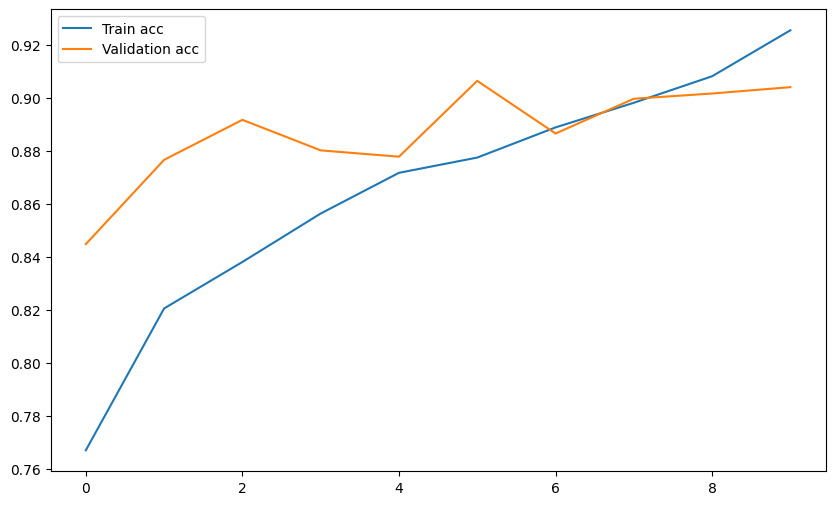

In [21]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

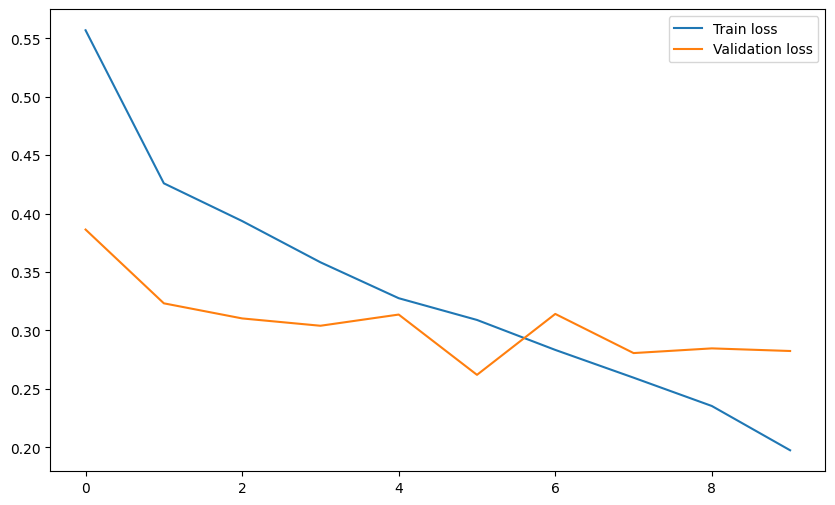

In [22]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

**MODEL PREDICTION**

In [23]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 1s 1s/step
This image -> Organic


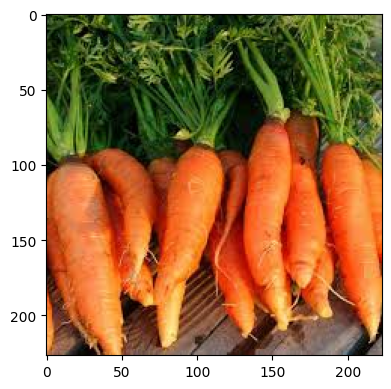

In [24]:
test_img = cv2.imread("/content/DATASET/TEST/O/O_12568.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 66ms/step
This image -> Recyclable


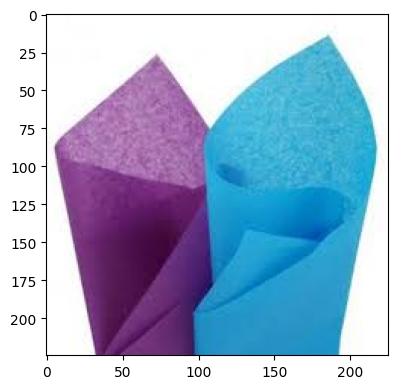

In [26]:
test_img = cv2.imread("/content/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)